In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ast
from sklearn.decomposition import PCA
	
plt.rcParams["figure.figsize"] = (12,8)
TRAIN = 0
EVAL = 1

In [2]:
def plott(embeddings_df, labels_df, title='', task_param='velocity', show_labels=False):
    pca = PCA(n_components=2)
    pca.fit(embeddings_df)
    embeddings = pca.transform(embeddings_df)
    
    stages = np.array([TRAIN if ast.literal_eval(label)['stage'] == 'train' else EVAL for label in labels_df[0].array])
    tasks = np.array([float("{0:.2f}".format(ast.literal_eval(label)[task_param])) for label in labels_df[0].array])

    embeddings_train = np.array([embedding for i, embedding in enumerate(embeddings) if stages[i] == TRAIN])
    embeddings_eval = np.array([embedding for i, embedding in enumerate(embeddings) if stages[i] == EVAL])
    tasks_train = np.array([task for i, task in enumerate(tasks) if stages[i] == TRAIN])
    tasks_eval = np.array([task for i, task in enumerate(tasks) if stages[i] == EVAL])

    plt.scatter(embeddings_train[:, 0], embeddings_train[:, 1], c=tasks_train, cmap='rainbow', marker="o", s=50, label='Train')
    plt.clim(tasks.min(), tasks.max())
    plt.scatter(embeddings_eval[:, 0], embeddings_eval[:, 1], c=tasks_eval, cmap='rainbow', marker="+", s=50, label='Eval')
    plt.clim(tasks.min(), tasks.max())
    plt.colorbar().set_label(task_param, rotation=270)
    if show_labels:
        for label, x, y in zip(tasks, embeddings[:, 0], embeddings[:, 1]):
            plt.text(x + 0.01, y + 0.01, label, fontsize=8)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

In [3]:
experiments = []

for dirname, _, _ in os.walk('output'):
    if 'embeddings' in dirname.split('/')[-1]:
        experiments.append(dirname)

experiments.sort()
for i, experiment in enumerate(experiments):
    print(i, experiment)

0 output/cheetah-vel/2020_02_16_00_49_55/embeddings
1 output/cheetah-vel/2020_02_17_18_09_55/embeddings
2 output/cheetah-vel/2020_03_03_16_20_26/embeddings
3 output/cheetah-vel/2020_03_04_17_23_41/embeddings
4 output/cheetah-vel/2020_03_05_23_41_01/embeddings
5 output/cheetah-vel/2020_03_06_13_23_33/embeddings
6 output/cheetah-vel/2020_03_07_17_09_05/embeddings
7 output/cheetah-vel/2020_03_07_23_12_39/embeddings
8 output/cheetah-vel/2020_03_17_00_33_59/embeddings
9 output/cheetah-vel/2020_03_26_04_30_37/embeddings
10 output/cheetah-vel/2020_03_26_04_34_42/embeddings
11 output/cheetah-vel/2020_03_27_00_51_58/embeddings
12 output/cheetah-vel/2020_03_29_22_24_16/embeddings


In [4]:
results = [
    #(0, 'Int. Obs 1', 'velocity'),
    #(1, 'Int. Ctx 1', 'velocity'),
    #(2, 'PEARL 1', 'velocity'),
    #(3, 'PEARL 2', 'velocity'),
    #(4, 'Int. Ctx 2', 'velocity'),
    #(5, 'Ctx Only Grads', 'velocity'),
    #(6, 'Int. Ctx 3', 'velocity'),
    #(7, 'Int. Ctx 4', 'velocity'),
    #(8, 'L2 0.1', 'velocity'),
    #(9, 'Dropout', 'velocity'),    
    #(10, 'L2 0.01 1', 'velocity'),
    (11, 'L2 0.01 2', 'velocity'),
    #(12, 'PEARL 3', 'velocity'),
    #(3, 'Reach Normalized', 'goal')
]

adapt_index = '00002'

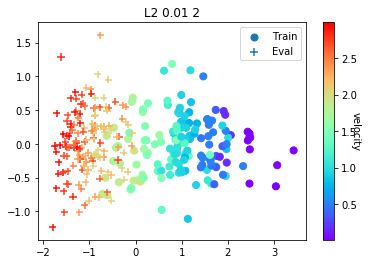

In [5]:
for experiment_index, experiment_name, task_param, in results:
    path = os.path.join(experiments[experiment_index], adapt_index)
    embeddings_df = pd.read_csv(os.path.join(path, 'default/tensors.tsv'), sep='\t', header=None)
    labels_df = pd.read_csv(os.path.join(path, 'default/metadata.tsv'), sep='\t', header=None)

    plott(embeddings_df, labels_df, title=experiment_name, task_param=task_param)